# MARQUER Matthieu
## Projet 9 part.1
![alt text](Logo.png "La poule qui chante")

# Notebook contenant la préparation, le nettoyage et l’analyse exploratoire des données.

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importation des fichiers excel

In [2]:
# Import csv
D_Alim_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
Population_2000_2018 = pd.read_csv('Population_2000_2018.csv')
CroissanceAnnuUSsParHab = pd.read_csv('FAOSTAT_data_fr_2-28-2023-CroissanceAnuelleUSsParHab.csv')
ValeurUssParHab = pd.read_csv('FAOSTAT_data_fr_2-28-2023--ValeurUssParHab.csv')
Stabilité_politique = pd.read_csv('FAOSTAT_data_en_2-23-2023-PoliticalStability.csv')
Food_Inflation = pd.read_csv('FAOSTAT_data_fr_2-28-2023-inflation.csv')
Prod_Brut_Agricole_CroissanceAnnuelle = pd.read_csv('FAOSTAT_data_fr_2-28-2023-production_brute_agricole_croissance_annuelleUSs.csv')

### 1.0 - Vue global

In [3]:
D_Alim_2017.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées


In [4]:
Population_2000_2018.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN


In [5]:
Stabilité_politique.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2000,2000,indice,-2.44,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2002,2002,indice,-2.04,X,Ciffre de sources internationales,NaN


In [6]:
CroissanceAnnuUSsParHab.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2017,2017,%,2.227740,E,Valeur estimée,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2017,2017,%,16.114973,E,Valeur estimée,NaN


In [7]:
ValeurUssParHab.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.616409,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Ciffre de sources internationales,NaN


In [8]:
Food_Inflation.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,4,Afghanistan,2001,2001,23014,Food price inflation,7009,Septembre,%,0.789062,E,Valeur estimée,NaN
1,CP,Indices de Prix à la Consommation,4,Afghanistan,2002,2002,23014,Food price inflation,7009,Septembre,%,20.078144,E,Valeur estimée,NaN


### 1.1 - D_Alim_2017

In [9]:
# Aperçu
D_Alim_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [10]:
# Vérification des types
D_Alim_2017.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [11]:
# Recherche des valeurs manquantes
D_Alim_2017.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [12]:
# Vérification du nombre de lignes et de colonnes
D_Alim_2017.shape

(176600, 14)

In [13]:
# Vérification 
D_Alim_2017.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [14]:
# Supression des colonnes inutile:
D_Alim_2017_v2 = D_Alim_2017.drop(columns=['Code Domaine','Domaine', 'Code zone', 'Code Élément', 'Code Produit', 'Code année', 'Année', 'Unité', 'Symbole', 'Description du Symbole'])
D_Alim_2017_v2.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,Afghanistan,Variation de stock,Blé et produits,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0


In [15]:
# Liste des produits
D_Alim_2017_v2.Produit.unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [16]:
# DF viandes hors Viande de Anim Aquatiq
ListViande = ['Viande de Bovins',
       "Viande d'Ovins/Caprins", 'Viande de Suides',
       'Viande de Volailles', 'Viande, Autre', 'Abats Comestible']
Viandes = D_Alim_2017_v2.loc[D_Alim_2017_v2.Produit.isin (ListViande),:]
Viandes.Produit.unique()

array(['Viande de Bovins', "Viande d'Ovins/Caprins", 'Viande de Suides',
       'Viande de Volailles', 'Viande, Autre', 'Abats Comestible'],
      dtype=object)

In [17]:
# DF Nourriture Viandes
Nourriture = Viandes.loc[Viandes['Élément'] == 'Nourriture',:]
Nourriture = Nourriture.drop(columns='Élément')
Nourriture = pd.pivot_table(Nourriture, values='Valeur', index=['Zone'], columns=['Produit'], fill_value=0).reset_index()
# Ajout d'une colonnes Total des viandes pour la nourriture
Nourriture['Nourriture: Total Des Viandes'] = Nourriture['Abats Comestible'] + Nourriture["Viande d'Ovins/Caprins"] + Nourriture["Viande de Bovins"] + Nourriture["Viande de Suides"] + Nourriture["Viande de Volailles"] + Nourriture["Viande, Autre"] 
# Séléction du total des viandes + viande de Volailles par pays
Nourriture = Nourriture[['Zone', "Viande de Volailles", 'Nourriture: Total Des Viandes']]
Nourriture = Nourriture.rename(columns={'Viande de Volailles': 'Nourriture: Viande de Volailles'})
Nourriture.head(2)

Produit,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes
0,Afghanistan,55,365
1,Afrique du Sud,2035,3704


In [18]:
# DF Importation Nourriture Viandes
Importation = Viandes.loc[Viandes['Élément'] == 'Importations - Quantité',:]
Importation = Importation.drop(columns='Élément')
Importation = pd.pivot_table(Importation, values='Valeur', index=['Zone'], columns=['Produit'], fill_value=0).reset_index()
# Ajout d'une colonnes Total des viandes pour l'Importation
Importation["Importation: Total d'importation Des Viandes"] = Importation['Abats Comestible'] + Importation["Viande d'Ovins/Caprins"] + Importation["Viande de Bovins"] + Importation["Viande de Suides"] + Importation["Viande de Volailles"] + Importation["Viande, Autre"] 
# Séléction du total des viandes + viande de Volailles par pays
Importation = Importation[["Zone", "Viande de Volailles", "Importation: Total d'importation Des Viandes"]]
Importation = Importation.rename(columns={'Viande de Volailles': 'Importation: Viande de Volailles'})
Importation.head(2)

Produit,Zone,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes
0,Afghanistan,29,41
1,Afrique du Sud,514,671


In [19]:
# DF Exportation Nourriture Viandes
Exportation = Viandes.loc[Viandes['Élément'] == 'Exportations - Quantité',:]
Exportation = Exportation.drop(columns='Élément')
Exportation = pd.pivot_table(Exportation, values='Valeur', index=['Zone'], columns=['Produit'], fill_value=0).reset_index()
# Ajout d'une colonnes Total des viandes pour l'Exportation
Exportation["Exportation: Total d'exportation Des Viandes"] = Exportation['Abats Comestible'] + Exportation["Viande d'Ovins/Caprins"] + Exportation["Viande de Bovins"] + Exportation["Viande de Suides"] + Exportation["Viande de Volailles"] + Exportation["Viande, Autre"] 
# Séléction du total des viandes + viande de Volailles par pays
Exportation = Exportation[["Zone", "Viande de Volailles", "Exportation: Total d'exportation Des Viandes"]]
Exportation = Exportation.rename(columns={'Viande de Volailles': 'Exportation: Viande de Volailles'})
Exportation.head(2)

Produit,Zone,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes
0,Afrique du Sud,63,161
1,Albanie,0,0


In [20]:
# DF Pertes Nourriture Viandes
Pertes = Viandes.loc[Viandes['Élément'] == 'Pertes',:]
Pertes = Pertes.drop(columns='Élément')
Pertes = pd.pivot_table(Pertes, values='Valeur', index=['Zone'], columns=['Produit'], fill_value=0).reset_index()
# Ajout d'une colonnes Total des Pertes de viandes
Pertes["Pertes: Total de Pertes Des Viandes"] = Pertes['Abats Comestible'] + Pertes["Viande d'Ovins/Caprins"] + Pertes["Viande de Bovins"] + Pertes["Viande de Suides"] + Pertes["Viande de Volailles"] + Pertes["Viande, Autre"] 
# Séléction du total des viandes + viande de Volailles par pays
Pertes = Pertes[['Zone',"Viande de Volailles", "Pertes: Total de Pertes Des Viandes"]]
Pertes = Pertes.rename(columns={'Viande de Volailles': 'Pertes: Viande de Volailles'})
Pertes.head(2)

Produit,Zone,Pertes: Viande de Volailles,Pertes: Total de Pertes Des Viandes
0,Afghanistan,2,17
1,Afrique du Sud,83,154


In [21]:
# DF Nourriture Viandes
Proteine = Viandes.loc[Viandes['Élément'] == 'Disponibilité de protéines en quantité (g/personne/jour)',:]
Proteine = Proteine.drop(columns='Élément')
# Pivot de Produit
Proteine = pd.pivot_table(Proteine, values='Valeur', index=['Zone'], columns=['Produit'], fill_value=0).reset_index()
# Ajout d'une colonnes Total Proteine des viandes pour la nourriture
Proteine['Protéines: Total Des Viandes (g/personne/jour)'] = Proteine['Abats Comestible'] + Proteine["Viande d'Ovins/Caprins"] + Proteine["Viande de Bovins"] + Proteine["Viande de Suides"] + Proteine["Viande de Volailles"] + Proteine["Viande, Autre"] 
# Séléction du total des viandes + viande de Volailles par pays
Proteine = Proteine[["Zone", "Viande de Volailles", "Protéines: Total Des Viandes (g/personne/jour)"]]
Proteine = Proteine.rename(columns={'Viande de Volailles': 'Proteine: Viande de Volailles (g/personne/jour)'})
Proteine.head(2)

Produit,Zone,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour)
0,Afghanistan,0.54,4.03
1,Afrique du Sud,14.11,25.92


### 1.2 - Population_2000_2018

In [22]:
# Aperçu 
Population_2000_2018.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [23]:
# Vérification des types
Population_2000_2018.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

In [24]:
# Recherche des valeurs manquantes
Population_2000_2018.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [25]:
# Vérification du nombre de lignes et de colonnes
Population_2000_2018.shape

(4411, 15)

In [26]:
Population_2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [27]:
# Vérification 
Population_2000_2018.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


In [28]:
# Population x 1000
Population_2000_2018["Population"] = Population_2000_2018.Valeur * 1000
# Suppression des colonnes inutile:
Population_2000_2018_v2 = Population_2000_2018.drop(columns=['Code Domaine','Domaine', 'Code zone', 'Élément', 'Code Élément', 'Code Produit', 'Produit', 'Code année', 'Unité', 'Valeur', 'Symbole', 'Description du Symbole', 'Note'])
# Evolution population par pays 2000 à 2018 --- Evolution_Pop
Popu2000 = Population_2000_2018_v2[Population_2000_2018_v2['Année'] == 2000]
Popu2018 = Population_2000_2018_v2[Population_2000_2018_v2['Année'] == 2018]
Popu2000and2018 = pd.merge(Popu2000, Popu2018, on='Zone')
Popu2000and2018 = Popu2000and2018.rename(columns={'Population_x': 'Population_2000', 'Population_y': 'Population_2018'})
Popu2000and2018 = Popu2000and2018.drop(columns=['Année_x', 'Année_y'])
Popu2000and2018['Evolution Population 2000_2018 (%)'] = (Popu2000and2018['Population_2018'] - Popu2000and2018['Population_2000']) / Popu2000and2018['Population_2000'] * 100
# Ajout de l'année 2017 
Population_2017 = Population_2000_2018_v2.loc[Population_2000_2018_v2.Année == 2017]
Population_2017 = Population_2017.rename(columns={"Population":"Population_2017"})
Population_2017 = Population_2017.drop(columns=['Année'])
PopulationFinal = pd.merge(Popu2000and2018, Population_2017, on='Zone') 
PopulationFinal = PopulationFinal.drop(columns=['Population_2000','Population_2018'])
PopulationFinal.head(2)

,Zone,Evolution Population 2000_2018 (%),Population_2017
0,Afghanistan,78.883566,36296113.0
1,Afrique du Sud,28.520044,57009756.0


### 1.3 Stabilité_politique

In [29]:
Stabilité_politique.head(3)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2000,2000,indice,-2.44,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2002,2002,indice,-2.04,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2003,2003,indice,-2.20,X,Ciffre de sources internationales,NaN


In [30]:
Stabilité_politique.dtypes

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [31]:
# Stabilité_politique selection de l'année 2017
Stabilité_politique = Stabilité_politique[Stabilité_politique['Année'] == 2017]
Stabilité_politique = Stabilité_politique.rename(columns={"Valeur":"Political_Stability_2017","Area":"Zone"})
Stabilité_politique = Stabilité_politique[['Zone', 'Political_Stability_2017']]
Stabilité_politique.head(2)

,Zone,Political_Stability_2017
16,Afghanistan,-2.80
36,Afrique du Sud,-0.28


### 1.4 PIB

In [32]:
# Aperçu
CroissanceAnnuUSsParHab.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2017,2017,%,2.227740,E,Valeur estimée,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2017,2017,%,16.114973,E,Valeur estimée,NaN


In [33]:
CroissanceAnnuUSsParHab.dtypes

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [34]:
# Recherche des valeurs manquantes
CroissanceAnnuUSsParHab.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      211
dtype: int64

In [35]:
# Vérification 
CroissanceAnnuUSsParHab.describe(include='all')

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,211,211,211.000000,211,211.0,211,211.0,211,211.0,211.0,211,211.000000,211,211,0.0
unique,1,1,NaN,211,NaN,1,NaN,1,NaN,NaN,1,NaN,1,1,NaN
top,MK,Indicateurs macro,NaN,Afghanistan,NaN,Croissance annuelle US$ par habitant,NaN,Produit Intérieur Brut,NaN,NaN,%,NaN,E,Valeur estimée,NaN
freq,211,211,NaN,1,NaN,211,NaN,211,NaN,NaN,211,NaN,211,211,NaN
mean,NaN,NaN,429.407583,NaN,61290.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,5.851621,NaN,NaN,NaN
std,NaN,NaN,251.237972,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,7.495883,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,61290.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,-29.289470,NaN,NaN,NaN
25%,NaN,NaN,210.000000,NaN,61290.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,3.431758,NaN,NaN,NaN
50%,NaN,NaN,430.000000,NaN,61290.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,5.713921,NaN,NaN,NaN
75%,NaN,NaN,642.500000,NaN,61290.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,8.883510,NaN,NaN,NaN


In [36]:
# Aperçu
ValeurUssParHab.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.616409,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Ciffre de sources internationales,NaN


In [37]:
ValeurUssParHab.dtypes

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [38]:
# Recherche des valeurs manquantes
ValeurUssParHab.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      211
dtype: int64

In [39]:
# Vérification 
ValeurUssParHab.describe(include='all')

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,211,211,211.000000,211,211.0,211,211.0,211,211.0,211.0,211,211.000000,211,211,0.0
unique,1,1,NaN,211,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,NaN
top,MK,Indicateurs macro,NaN,Afghanistan,NaN,Valeur US $ par habitant,NaN,Produit Intérieur Brut,NaN,NaN,US$,NaN,X,Ciffre de sources internationales,NaN
freq,211,211,NaN,1,NaN,211,NaN,211,NaN,NaN,211,NaN,210,210,NaN
mean,NaN,NaN,429.407583,NaN,6119.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,16934.384856,NaN,NaN,NaN
std,NaN,NaN,251.237972,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,25494.984628,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,6119.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,111.048078,NaN,NaN,NaN
25%,NaN,NaN,210.000000,NaN,6119.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,2132.827928,NaN,NaN,NaN
50%,NaN,NaN,430.000000,NaN,6119.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,6376.707362,NaN,NaN,NaN
75%,NaN,NaN,642.500000,NaN,6119.0,NaN,22008.0,NaN,2017.0,2017.0,NaN,20073.940387,NaN,NaN,NaN


In [40]:
# Garde colonne Zone et valeur pour la croissance annuelle en US $ par habitant
CroissanceAnnuUSsParHab = CroissanceAnnuUSsParHab[['Zone', 'Valeur']]
# Rename colonne
CroissanceAnnuUSsParHab = CroissanceAnnuUSsParHab.rename(columns={'Valeur':'Croissance annuelle Pib US$ par habitant (%) 2017'})
# Garde colonne Zone et valeur pour Pib en US $ par habitant
ValeurUssParHab = ValeurUssParHab[['Zone', 'Valeur']]
# Rename colonne
ValeurUssParHab = ValeurUssParHab.rename(columns={'Valeur':'Pib US$ par habitant (2017)'})
# Merge de CroissanceAnnuUSsParHab et ValeurUssParHab
Pib = pd.merge(CroissanceAnnuUSsParHab, ValeurUssParHab, on='Zone')
Pib.head(2)

,Zone,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017)
0,Afghanistan,2.227740,520.616409
1,Afrique du Sud,16.114973,6121.876572


In [41]:
# Verification pib par habitant
Pib.loc[Pib["Zone"] == "France", :]

,Zone,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017)
68,France,4.707836,38720.645922


In [42]:
# Aperçu
Food_Inflation.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,4,Afghanistan,2001,2001,23014,Food price inflation,7009,Septembre,%,0.789062,E,Valeur estimée,NaN
1,CP,Indices de Prix à la Consommation,4,Afghanistan,2002,2002,23014,Food price inflation,7009,Septembre,%,20.078144,E,Valeur estimée,NaN


In [43]:
Food_Inflation.dtypes

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code année                  int64
Année                       int64
Code Produit                int64
Produit                    object
Code Mois                   int64
Mois                       object
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [44]:
# Recherche des valeurs manquantes
Food_Inflation.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone (M49)              0
Zone                         0
Code année                   0
Année                        0
Code Produit                 0
Produit                      0
Code Mois                    0
Mois                         0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4450
dtype: int64

In [45]:
# Vérification 
Food_Inflation.describe(include='all')

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole,Note
count,4450,4450,4450.000000,4450,4450.000000,4450.000000,4450.0,4450,4450.0,4450,4450,4450.000000,4450,4450,0.0
unique,1,1,NaN,203,NaN,NaN,NaN,1,NaN,1,1,NaN,1,1,NaN
top,CP,Indices de Prix à la Consommation,NaN,Afghanistan,NaN,NaN,NaN,Food price inflation,NaN,Septembre,%,NaN,E,Valeur estimée,NaN
freq,4450,4450,NaN,22,NaN,NaN,NaN,4450,NaN,4450,4450,NaN,4450,4450,NaN
mean,NaN,NaN,424.680000,NaN,2011.525169,2011.525169,23014.0,NaN,7009.0,NaN,NaN,28.062898,NaN,NaN,NaN
std,NaN,NaN,249.687778,NaN,6.340983,6.340983,0.0,NaN,0.0,NaN,NaN,943.501402,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,2001.000000,2001.000000,23014.0,NaN,7009.0,NaN,NaN,-21.504898,NaN,NaN,NaN
25%,NaN,NaN,212.000000,NaN,2006.000000,2006.000000,23014.0,NaN,7009.0,NaN,NaN,1.467864,NaN,NaN,NaN
50%,NaN,NaN,426.000000,NaN,2012.000000,2012.000000,23014.0,NaN,7009.0,NaN,NaN,3.951223,NaN,NaN,NaN
75%,NaN,NaN,638.000000,NaN,2017.000000,2017.000000,23014.0,NaN,7009.0,NaN,NaN,8.563230,NaN,NaN,NaN


In [46]:
# Sélection année 2017
Food_Inflation = Food_Inflation[Food_Inflation['Année'] == 2017]
# choix des colonnes à garder
Food_Inflation = Food_Inflation[['Zone', 'Valeur']]
# Rename colonne
Food_Inflation = Food_Inflation.rename(columns={'Valeur':'Inflation alimentaire (%) 2017'})

In [47]:
Food_Inflation.head(2)

,Zone,Inflation alimentaire (%) 2017
16,Afghanistan,5.377640
38,Afrique du Sud,5.076188


# Jointure des tables

In [48]:
# DF Nourriture_Importation
Nourriture_Importation = pd.merge(Nourriture, Importation, on='Zone', how='outer', indicator=True)
# Rappel nombre ligne + comparaison avec le merge
Nourriture.shape, Importation.shape, Nourriture_Importation.shape

((170, 3), (170, 3), (170, 6))

In [49]:
# Suppression de la colonne '_merge'
Nourriture_Importation.drop(columns=['_merge'], inplace=True)

In [50]:
# DF Nourriture_Import_Pertes
Nourriture_Import_Export = pd.merge(Nourriture_Importation, Exportation, on='Zone', how='outer', indicator=True)
# Rappel nombre ligne + comparaison avec le merge
Nourriture_Importation.shape, Exportation.shape, Nourriture_Import_Export.shape

((170, 5), (154, 3), (170, 8))

In [51]:
# Affichage de la différence
Nourriture_Import_Export.loc[Nourriture_Import_Export['_merge'] == 'left_only']

Produit,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,_merge
0,Afghanistan,55,365,29,41,NaN,NaN,left_only
13,Bahamas,16,26,24,36,NaN,NaN,left_only
23,Burkina Faso,44,263,0,0,NaN,NaN,left_only
26,Cabo Verde,9,18,12,16,NaN,NaN,left_only
27,Cambodge,37,217,10,13,NaN,NaN,left_only
40,Cuba,269,656,312,370,NaN,NaN,left_only
43,Djibouti,3,17,3,3,NaN,NaN,left_only
56,Grenade,5,6,7,8,NaN,NaN,left_only
60,Guinée-Bissau,4,35,4,4,NaN,NaN,left_only
80,Kiribati,2,3,1,2,NaN,NaN,left_only


In [52]:
# On garde juste les 'both'
Nourriture_Import_Export = Nourriture_Import_Export.loc[Nourriture_Import_Export['_merge'] == 'both']
# Suppression de la colonne '_merge'
Nourriture_Import_Export.drop(columns=['_merge'], inplace=True)

In [53]:
# Ajout colonne Balance commercial: Si négatif importe plus qu'il exporte et vice versa
Nourriture_Import_Export['Balance commercial: import export volaille'] = Nourriture_Import_Export['Exportation: Viande de Volailles'] - Nourriture_Import_Export['Importation: Viande de Volailles']
Nourriture_Import_Export['Balance commercial: import export total des viandes'] = Nourriture_Import_Export["Exportation: Total d'exportation Des Viandes"] - Nourriture_Import_Export["Importation: Total d'importation Des Viandes"]

In [54]:
#Nourriture_Import_Export.loc[Nourriture_Import_Export["Balance commercial: import export volaille"]].ascending
Balance = Nourriture_Import_Export.set_index('Zone')
BalanceNeg = Balance["Balance commercial: import export volaille"].sort_values(ascending = True)
BalancePos = Balance["Balance commercial: import export volaille"].sort_values(ascending = False)
BalancePos.head(20)

Zone
Brésil                            4220.0
États-Unis d'Amérique             3569.0
Pologne                            970.0
Pays-Bas                           810.0
Thaïlande                          794.0
Turquie                            426.0
Belgique                           318.0
Argentine                          199.0
Ukraine                            152.0
Hongrie                            152.0
Bélarus                            131.0
Chine, continentale                124.0
Italie                              86.0
Iran (République islamique d')      39.0
Australie                           26.0
Lituanie                            24.0
Nouvelle-Zélande                    22.0
Slovénie                             9.0
Espagne                              7.0
Danemark                             6.0
Name: Balance commercial: import export volaille, dtype: float64

In [55]:
BalanceNeg.head(20)

Zone
Japon                                                 -1059.0
Mexique                                                -963.0
Arabie saoudite                                        -712.0
Iraq                                                   -470.0
Afrique du Sud                                         -451.0
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord    -420.0
Émirats arabes unis                                    -339.0
Viet Nam                                               -290.0
Angola                                                 -277.0
Philippines                                            -247.0
Chine - RAS de Hong-Kong                               -244.0
Allemagne                                              -196.0
Kazakhstan                                             -168.0
Chine, Taiwan Province de                              -153.0
Ghana                                                  -151.0
Koweït                                                 -133.0
Rép

In [56]:
# Nombre de pays
Nourriture_Import_Export.shape

(154, 9)

In [57]:
# Suppression des pays ou la balance commercial n'est pas interessante 
Nourriture_Import_Export = Nourriture_Import_Export.loc[Nourriture_Import_Export["Balance commercial: import export volaille"] <= 1]
# Suppression de la france
Nourriture_Import_Export = Nourriture_Import_Export.loc[Nourriture_Import_Export["Zone"] != "France"]
# Nombre de pays restant
Nourriture_Import_Export.shape

(127, 9)

In [58]:
Nourriture_Import_Export["Balance commercial: import export volaille"].sort_values(ascending = True)

75    -1059.0
98     -963.0
7      -712.0
69     -470.0
1      -451.0
        ...  
112       0.0
129       0.0
18        0.0
157       0.0
110       0.0
Name: Balance commercial: import export volaille, Length: 127, dtype: float64

In [59]:
# DF Nourriture_Import_Export_Prot
Nourriture_Import_Export_Prot = pd.merge(Nourriture_Import_Export, Proteine, on='Zone', how='outer', indicator=True)
# Rappel nombre ligne + comparaison avec le merge
Nourriture_Import_Export.shape, Proteine.shape, Nourriture_Import_Export_Prot.shape

((127, 9), (172, 3), (172, 12))

In [60]:
# Affichage de la différence
Nourriture_Import_Export_Prot.loc[Nourriture_Import_Export_Prot['_merge'] == 'right_only']

Produit,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),_merge
127,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54,4.03,right_only
128,Argentine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.53,47.36,right_only
129,Australie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.60,44.36,right_only
130,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.61,26.85,right_only
131,Belgique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.57,22.65,right_only
132,Brésil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.68,35.23,right_only
133,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,5.30,right_only
134,Bélarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.41,30.48,right_only
135,Cabo Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.52,12.27,right_only
136,Cambodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74,4.88,right_only


In [61]:
# On garde juste les 'both'
Nourriture_Import_Export_Prot = Nourriture_Import_Export_Prot.loc[Nourriture_Import_Export_Prot['_merge'] == 'both']
# Suppression de la colonne '_merge'
Nourriture_Import_Export_Prot.drop(columns=['_merge'], inplace=True)

In [62]:
# DF Nourriture_Import_Export_Prot_Popu
Nourriture_Import_Export_Prot_Popu = pd.merge(Nourriture_Import_Export_Prot, PopulationFinal, on='Zone', how='outer', indicator=True)
# Rappel nombre ligne + comparaison avec le merge
Nourriture_Import_Export_Prot.shape, PopulationFinal.shape, Nourriture_Import_Export_Prot_Popu.shape

((127, 11), (227, 3), (230, 14))

In [63]:
# Affichage de la différence coté gauche
Nourriture_Import_Export_Prot_Popu.loc[Nourriture_Import_Export_Prot_Popu['_merge'] == 'left_only']

,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,_merge
73,Monténégro,10.0,47.0,8.0,41.0,0.0,2.0,-8.0,-39.0,5.79,27.30,NaN,NaN,left_only
101,Serbie,90.0,504.0,12.0,52.0,7.0,45.0,-5.0,-7.0,3.50,19.66,NaN,NaN,left_only
104,Soudan,65.0,988.0,2.0,3.0,0.0,1.0,-2.0,-2.0,0.54,9.30,NaN,NaN,left_only


In [64]:
# Affichage de la différence coté droit
Nourriture_Import_Export_Prot_Popu.loc[Nourriture_Import_Export_Prot_Popu['_merge'] == 'right_only']

,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,_merge
127,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.883566,36296113.0,right_only
128,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.764184,77001.0,right_only
129,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.918948,14584.0,right_only
130,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.786915,275186.0,right_only
131,Argentine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.315170,43937140.0,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.332081,101998.0,right_only
226,Tunisie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.126329,11433443.0,right_only
227,Turquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.202143,81116450.0,right_only
228,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.503726,11370.0,right_only


In [65]:
# Liste des pays coté droit
Droit_NIEPP = Nourriture_Import_Export_Prot_Popu.loc[Nourriture_Import_Export_Prot_Popu['_merge'] == 'right_only']
Droit_NIEPP.Zone.unique()

array(['Afghanistan', 'Andorre', 'Anguilla',
       'Antilles néerlandaises (ex)', 'Argentine', 'Aruba', 'Australie',
       'Bahamas', 'Bahreïn', 'Bélarus', 'Belgique', 'Bermudes', 'Bhoutan',
       'Brésil', 'Brunéi Darussalam', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodge', 'Chine, continentale', 'Comores', 'Cuba',
       'Danemark', 'Djibouti', 'Érythrée', 'Espagne',
       "États-Unis d'Amérique", 'France', 'Gibraltar', 'Grenade',
       'Groenland', 'Guadeloupe', 'Guam', 'Guinée équatoriale',
       'Guinée-Bissau', 'Guyane française', 'Hongrie', 'Île de Man',
       'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook',
       'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord',
       'Îles Marshall', 'Îles Turques-et-Caïques',
       'Îles Vierges américaines', 'Îles Vierges britanniques',
       'Îles Wallis-et-Futuna', 'Inde', "Iran (République islamique d')",
       'Israël', 'Italie', 'Kiribati', 'Libye', 'Liechtenstein',
       'Lituanie', 'Mala

In [66]:
# On garde juste les 'both'
Nourriture_Import_Export_Prot_Popu = Nourriture_Import_Export_Prot_Popu.loc[Nourriture_Import_Export_Prot_Popu['_merge'] == 'both']
# Suppression de la colonne '_merge'
Nourriture_Import_Export_Prot_Popu.drop(columns=['_merge'], inplace=True)

In [67]:
# DF Nourriture_Import_Export_Prot_Popu_Stab
Nourriture_Import_Export_Prot_Popu_Stab = pd.merge(Nourriture_Import_Export_Prot_Popu, Stabilité_politique, on='Zone', how='outer', indicator=True)
# Rappel nombre ligne + comparaison avec le merge
Nourriture_Import_Export_Prot_Popu.shape, Stabilité_politique.shape, Nourriture_Import_Export_Prot_Popu_Stab.shape

((124, 13), (197, 2), (199, 15))

In [68]:
# Affichage de la différence coté gauche
Nourriture_Import_Export_Prot_Popu_Stab.loc[Nourriture_Import_Export_Prot_Popu_Stab['_merge'] == 'left_only']

,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,_merge
80,Nouvelle-Calédonie,11.0,21.0,9.0,17.0,0.0,0.0,-9.0,-17.0,14.05,26.60,28.869282,277150.0,NaN,left_only
86,Polynésie française,13.0,27.0,15.0,29.0,0.0,0.0,-15.0,-29.0,16.20,38.77,15.369818,276102.0,NaN,left_only


In [69]:
# Affichage de la différence coté droit
Nourriture_Import_Export_Prot_Popu_Stab.loc[Nourriture_Import_Export_Prot_Popu_Stab['_merge'] == 'right_only']

,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,_merge
124,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.80,right_only
125,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.42,right_only
126,Argentine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.17,right_only
127,Australie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.90,right_only
128,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.79,right_only
195,Tunisie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.02,right_only
196,Turquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.79,right_only
197,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,right_only


In [70]:
# On garde juste les 'both'
Nourriture_Import_Export_Prot_Popu_Stab = Nourriture_Import_Export_Prot_Popu_Stab.loc[Nourriture_Import_Export_Prot_Popu_Stab['_merge'] == 'both']
# Suppression de la colonne '_merge'
Nourriture_Import_Export_Prot_Popu_Stab.drop(columns=['_merge'], inplace=True)

In [71]:
# DF Nourriture_Import_Export_Prot_Popu_Stab_Pib
Nourriture_Import_Export_Prot_Popu_Stab_Pib = pd.merge(Nourriture_Import_Export_Prot_Popu_Stab, Pib, on='Zone', how='outer', indicator=True)
# Rappel nombre ligne + comparaison avec le merge
Nourriture_Import_Export_Prot_Popu_Stab.shape, Pib.shape, Nourriture_Import_Export_Prot_Popu_Stab_Pib.shape

((122, 14), (211, 3), (212, 17))

In [72]:
# Affichage de la différence coté gauche
Nourriture_Import_Export_Prot_Popu_Stab_Pib.loc[Nourriture_Import_Export_Prot_Popu_Stab_Pib['_merge'] == 'left_only']

,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),_merge
23,"Chine, Taiwan Province de",785.0,1882.0,161.0,426.0,8.0,11.0,-153.0,-415.0,11.01,26.33,8.011886,23674546.0,0.86,NaN,NaN,left_only


In [73]:
# Affichage de la différence coté droit
Nourriture_Import_Export_Prot_Popu_Stab_Pib.loc[Nourriture_Import_Export_Prot_Popu_Stab_Pib['_merge'] == 'right_only']

,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),_merge
122,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.227740,520.616409,right_only
123,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.043568,38962.613799,right_only
124,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.763339,19271.499970,right_only
125,Argentine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.316015,14648.845969,right_only
126,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.160394,29349.412216,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.672544,4522.873795,right_only
208,Tunisie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.859485,3481.203612,right_only
209,Turquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.798707,10589.573121,right_only
210,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.246060,3982.111321,right_only


In [74]:
# On garde juste les 'both'
Nourriture_Import_Export_Prot_Popu_Stab_Pib = Nourriture_Import_Export_Prot_Popu_Stab_Pib.loc[Nourriture_Import_Export_Prot_Popu_Stab_Pib['_merge'] == 'both']
# Suppression de la colonne '_merge'
Nourriture_Import_Export_Prot_Popu_Stab_Pib.drop(columns=['_merge'], inplace=True)

In [75]:
# DF Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf
Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf =  pd.merge(Nourriture_Import_Export_Prot_Popu_Stab_Pib, Food_Inflation, on='Zone', how='outer', indicator=True)
# Rappel nombre ligne + comparaison avec le merge
Nourriture_Import_Export_Prot_Popu_Stab_Pib.shape, Food_Inflation.shape, Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf.shape

((121, 16), (203, 2), (207, 18))

In [76]:
# Affichage de la différence coté gauche
Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf.loc[Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf['_merge'] == 'left_only']

,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,_merge
42,Guyana,30.0,37.0,0.0,2.0,0.0,0.0,0.0,-2.0,12.33,15.30,4.324408,775222.0,-0.04,5.395670,6124.922066,NaN,left_only
89,République centrafricaine,11.0,184.0,4.0,4.0,0.0,0.0,-4.0,-4.0,0.78,16.28,28.181886,4596023.0,-2.01,12.110939,450.900697,NaN,left_only
93,République populaire démocratique de Corée,41.0,365.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,5.65,11.428847,25429825.0,-0.50,2.949586,686.340258,NaN,left_only
108,Turkménistan,26.0,352.0,9.0,25.0,0.0,0.0,-9.0,-25.0,1.53,23.32,29.555551,5757667.0,-0.13,5.709055,6752.362494,NaN,left_only


In [77]:
# Affichage de la différence coté droit
Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf.loc[Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf['_merge'] == 'right_only']

,Zone,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017,_merge
121,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377640,right_only
122,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.399123,right_only
123,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.060247,right_only
124,Argentine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.771391,right_only
125,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.320735,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Timor-Leste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.409836,right_only
203,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.833333,right_only
204,Tunisie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.963398,right_only
205,Turquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.504073,right_only


In [78]:
# On garde juste les 'both'
Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf = Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf.loc[Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf['_merge'] == 'both']
# Suppression de la colonne '_merge'
Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf.drop(columns=['_merge'], inplace=True)
Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf.shape

(117, 17)

In [79]:
Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf = Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf.set_index('Zone')
DF_Final = Nourriture_Import_Export_Prot_Popu_Stab_Pib_Inf.dropna()
DF_Final.head(2)

,Nourriture: Viande de Volailles,Nourriture: Total Des Viandes,Importation: Viande de Volailles,Importation: Total d'importation Des Viandes,Exportation: Viande de Volailles,Exportation: Total d'exportation Des Viandes,Balance commercial: import export volaille,Balance commercial: import export total des viandes,Proteine: Viande de Volailles (g/personne/jour),Protéines: Total Des Viandes (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,,,,,,
Afrique du Sud,2035.0,3704.0,514.0,671.0,63.0,161.0,-451.0,-510.0,14.11,25.92,28.520044,57009756.0,-0.28,16.114973,6121.876572,5.076188
Albanie,47.0,153.0,38.0,54.0,0.0,0.0,-38.0,-54.0,6.26,20.96,-7.877400,2884169.0,0.38,9.852298,4514.204908,3.498871


In [80]:
DF_Final.shape

(117, 16)

In [81]:
# DF_Final 
DF_Final = DF_Final[['Nourriture: Viande de Volailles', 'Importation: Viande de Volailles', 'Exportation: Viande de Volailles', 'Balance commercial: import export volaille', 'Proteine: Viande de Volailles (g/personne/jour)', 'Evolution Population 2000_2018 (%)', 'Population_2017', 'Political_Stability_2017', 'Croissance annuelle Pib US$ par habitant (%) 2017', 'Pib US$ par habitant (2017)', 'Inflation alimentaire (%) 2017']]
DF_Final.head(2)

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Afrique du Sud,2035.0,514.0,63.0,-451.0,14.11,28.520044,57009756.0,-0.28,16.114973,6121.876572,5.076188
Albanie,47.0,38.0,0.0,-38.0,6.26,-7.877400,2884169.0,0.38,9.852298,4514.204908,3.498871


# Boxplot

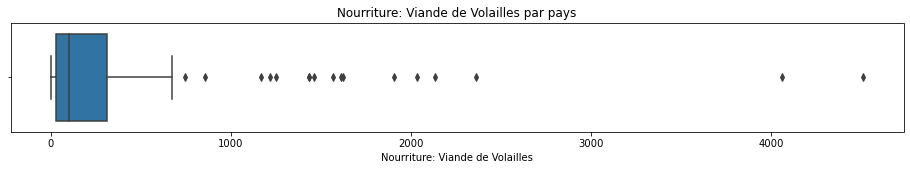

In [82]:
# Nourriture: Viande de Volailles par pays
plt.figure(figsize=(16,2))
plt.title("Nourriture: Viande de Volailles par pays")
sns.boxplot(x='Nourriture: Viande de Volailles', data=DF_Final)
plt.xlabel("Nourriture: Viande de Volailles")
plt.show()

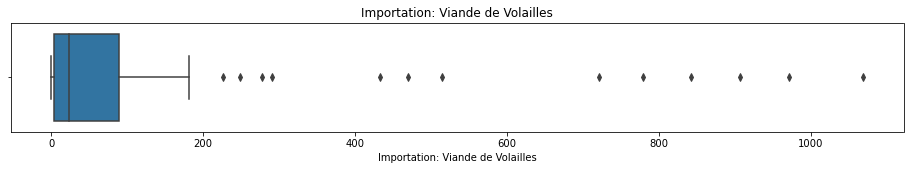

In [83]:
# Importation: Viande de Volailles par pays
plt.figure(figsize=(16,2))
plt.title("Importation: Viande de Volailles")
sns.boxplot(x='Importation: Viande de Volailles', data=DF_Final)
plt.xlabel("Importation: Viande de Volailles")
plt.show()

In [84]:
DF_Final.loc[DF_Final['Importation: Viande de Volailles'] > 600,:]

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Allemagne,1609.0,842.0,646.0,-196.0,7.96,2.117343,82658409.0,0.59,5.842947,44651.829102,2.988048
Arabie saoudite,1435.0,722.0,10.0,-712.0,15.57,63.100136,33101179.0,-0.64,4.646660,20802.464299,-0.316224
Chine - RAS de Hong-Kong,391.0,907.0,663.0,-244.0,22.26,11.585908,7306322.0,0.83,5.445126,46705.027813,1.867995
Japon,2359.0,1069.0,10.0,-1059.0,7.24,-0.252487,127502725.0,1.11,-1.254368,38672.407740,1.062071
Mexique,4058.0,972.0,9.0,-963.0,9.26,27.594526,124777324.0,-0.80,6.213095,9287.841557,8.710279
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,2131.0,779.0,359.0,-420.0,13.77,13.947579,66727461.0,0.39,-1.513432,40448.365256,3.189300


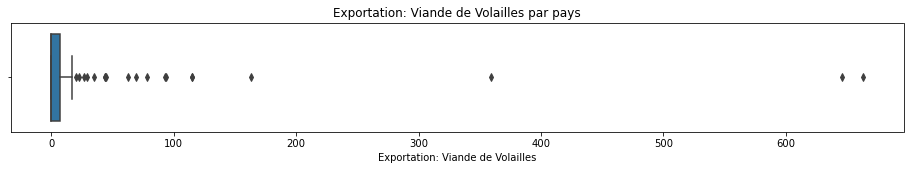

In [85]:
# Exportation: Viande de Volailles par pays
plt.figure(figsize=(16,2))
plt.title("Exportation: Viande de Volailles par pays")
sns.boxplot(x='Exportation: Viande de Volailles', data=DF_Final)
plt.xlabel("Exportation: Viande de Volailles")
plt.show()

In [86]:
DF_Final.loc[DF_Final['Exportation: Viande de Volailles'] > 150,:]

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Allemagne,1609.0,842.0,646.0,-196.0,7.96,2.117343,82658409.0,0.59,5.842947,44651.829102,2.988048
Canada,1433.0,182.0,163.0,-19.0,13.86,21.204714,36732095.0,1.10,6.909561,44906.748920,0.861441
Chine - RAS de Hong-Kong,391.0,907.0,663.0,-244.0,22.26,11.585908,7306322.0,0.83,5.445126,46705.027813,1.867995
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,2131.0,779.0,359.0,-420.0,13.77,13.947579,66727461.0,0.39,-1.513432,40448.365256,3.189300


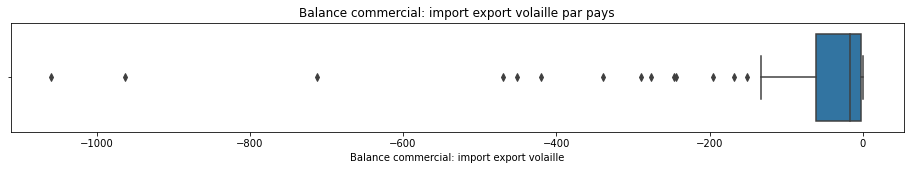

In [87]:
# Balance commercial: import export volaille par pays
plt.figure(figsize=(16,2))
plt.title("Balance commercial: import export volaille par pays")
sns.boxplot(x='Balance commercial: import export volaille', data=DF_Final)
plt.xlabel("Balance commercial: import export volaille")
plt.show()

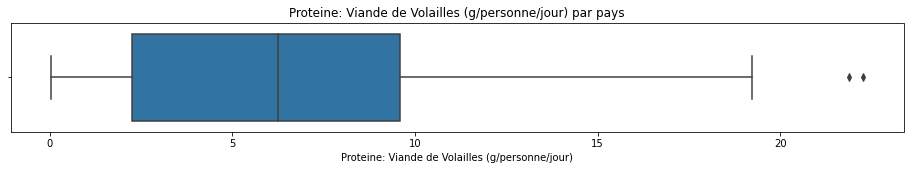

In [88]:
# Proteine: Viande de Volailles (g/personne/jour) par pays
plt.figure(figsize=(16,2))
plt.title("Proteine: Viande de Volailles (g/personne/jour) par pays")
sns.boxplot(x='Proteine: Viande de Volailles (g/personne/jour)', data=DF_Final)
plt.xlabel("Proteine: Viande de Volailles (g/personne/jour)")
plt.show()

In [89]:
DF_Final.loc[DF_Final['Proteine: Viande de Volailles (g/personne/jour)'] > 20,:]

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Chine - RAS de Hong-Kong,391.0,907.0,663.0,-244.0,22.26,11.585908,7306322.0,0.83,5.445126,46705.027813,1.867995
Samoa,13.0,17.0,0.0,-17.0,21.88,12.424479,195352.0,1.18,-0.002802,4223.478963,2.159574


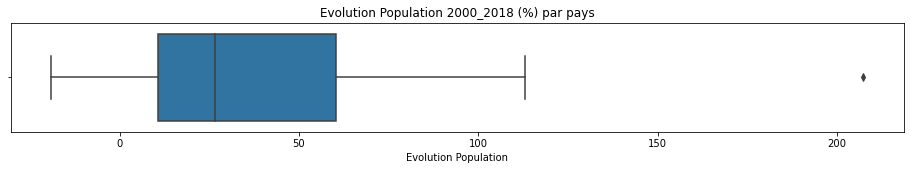

In [90]:
# Evolution Population 2000_2018 (%) par pays
plt.figure(figsize=(16,2))
plt.title("Evolution Population 2000_2018 (%) par pays")
sns.boxplot(x='Evolution Population 2000_2018 (%)', data=DF_Final)
plt.xlabel("Evolution Population")
plt.show()

In [91]:
DF_Final.loc[DF_Final['Evolution Population 2000_2018 (%)'] > 100,:]

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Koweït,188.0,137.0,4.0,-133.0,15.87,102.301377,4056099.0,-0.05,7.612780,29754.636332,-0.821475
Oman,101.0,126.0,16.0,-110.0,7.38,112.942262,4665928.0,0.75,3.501058,15130.543438,1.835749
Émirats arabes unis,412.0,433.0,94.0,-339.0,14.80,207.299568,9487203.0,0.62,6.562207,40644.804043,1.545490


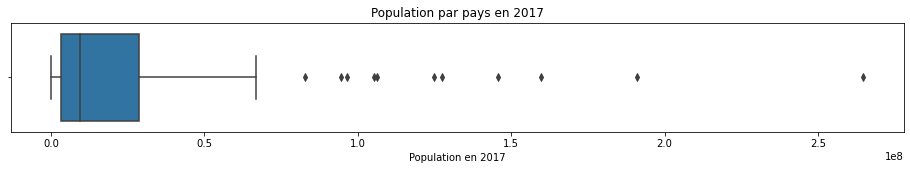

In [92]:
# Population 2017 par pays
plt.figure(figsize=(16,2))
plt.title("Population par pays en 2017")
sns.boxplot(x='Population_2017', data=DF_Final)
plt.xlabel("Population en 2017")
#plt.xticks([0, 250000000, 500000000, 750000000, 1000000000, 1250000000, 1500000000])
plt.show()

In [93]:
DF_Final.loc[DF_Final['Population_2017'] > 200000000,:]

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Indonésie,1904.0,1.0,0.0,-1.0,2.42,26.549905,264650963.0,-0.5,7.711925,3837.578117,1.044386


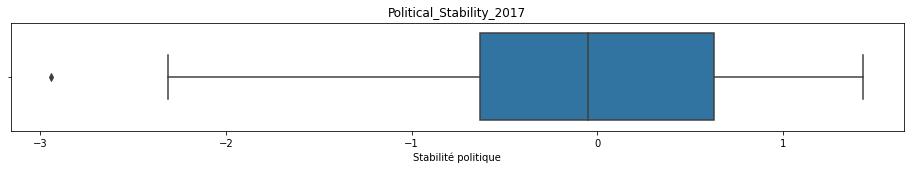

In [94]:
# Political_Stability_2017 par pays
plt.figure(figsize=(16,2))
plt.title("Political_Stability_2017")
sns.boxplot(x='Political_Stability_2017', data=DF_Final)
plt.xlabel("Stabilité politique")
plt.show()

In [95]:
DF_Final.loc[DF_Final['Political_Stability_2017'] < -1.5,:]

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Iraq,561.0,470.0,0.0,-470.0,5.37,63.564043,37552781.0,-2.31,9.554553,4985.453728,-3.118712
Liban,73.0,13.0,4.0,-9.0,3.90,78.501282,6819373.0,-1.63,2.167191,7819.604670,4.515792
Mali,52.0,1.0,0.0,-1.0,0.96,74.282600,18512430.0,-1.91,6.314350,830.021400,-1.862270
Nigéria,192.0,0.0,0.0,0.0,0.31,60.180337,190873244.0,-2.00,-9.527161,1968.687237,20.246348
Yémen,237.0,78.0,0.0,-78.0,3.04,63.700185,27834819.0,-2.94,-8.143611,745.087677,3.575285
Éthiopie,14.0,1.0,0.0,-1.0,0.04,64.929766,106399924.0,-1.68,3.628870,721.753494,10.835540


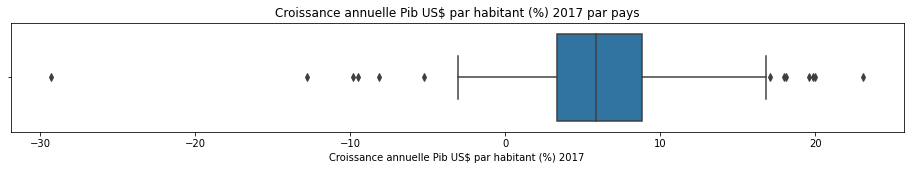

In [96]:
# Croissance annuelle Pib US$ par habitant (%) 2017
plt.figure(figsize=(16,2))
plt.title("Croissance annuelle Pib US$ par habitant (%) 2017 par pays")
sns.boxplot(x='Croissance annuelle Pib US$ par habitant (%) 2017', data=DF_Final)
plt.xlabel("Croissance annuelle Pib US$ par habitant (%) 2017")
plt.show()

In [97]:
# Croissance annuelle négative du pib par habitant
DF_Final.loc[DF_Final['Croissance annuelle Pib US$ par habitant (%) 2017'] < -15,:]

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Égypte,1250.0,110.0,1.0,-109.0,4.51,42.99196,96442591.0,-1.42,-29.28947,2023.331158,41.223595


In [98]:
# Croissance annuelle du pib par habitant
DF_Final.loc[DF_Final['Croissance annuelle Pib US$ par habitant (%) 2017'] > 21,:]

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Fédération de Russie,4509.0,226.0,115.0,-111.0,10.44,-0.458226,145530082.0,-0.64,23.078092,10817.003315,1.650093


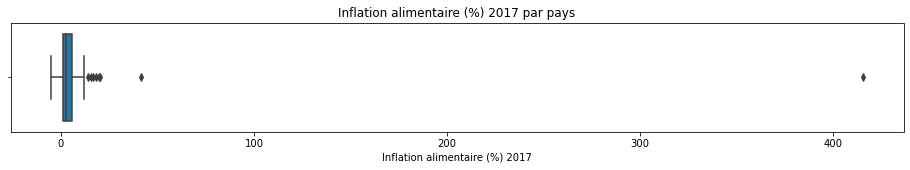

In [99]:
# Inflation alimentaire (%) 2017
plt.figure(figsize=(16,2))
plt.title("Inflation alimentaire (%) 2017 par pays")
sns.boxplot(x='Inflation alimentaire (%) 2017', data=DF_Final)
plt.xlabel("Inflation alimentaire (%) 2017")
plt.show()

In [100]:
DF_Final.loc[DF_Final['Inflation alimentaire (%) 2017'] > 30,:]

,Nourriture: Viande de Volailles,Importation: Viande de Volailles,Exportation: Viande de Volailles,Balance commercial: import export volaille,Proteine: Viande de Volailles (g/personne/jour),Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,,,,,
Venezuela (République bolivarienne du),596.0,25.0,0.0,-25.0,7.23,19.405528,29402484.0,-1.27,-12.759351,8432.288335,415.338462
Égypte,1250.0,110.0,1.0,-109.0,4.51,42.991960,96442591.0,-1.42,-29.289470,2023.331158,41.223595


In [102]:
# Suppression des outliers
DF_Final = DF_Final.loc[DF_Final['Exportation: Viande de Volailles'] < 150,:]
DF_Final = DF_Final.loc[DF_Final['Inflation alimentaire (%) 2017'] < 30,:] 
DF_Final = DF_Final.loc[DF_Final['Political_Stability_2017'] > -1.5,:]
DF_Final = DF_Final.loc[DF_Final['Croissance annuelle Pib US$ par habitant (%) 2017'] > -15,:]
DF_Final = DF_Final.loc[DF_Final['Inflation alimentaire (%) 2017'] < 15,:]
DF_Final = DF_Final.loc[DF_Final['Population_2017'] < 200000000,:]

In [103]:
# DF Socio Eco
DF_Eco = DF_Final[['Balance commercial: import export volaille','Evolution Population 2000_2018 (%)','Population_2017', 'Political_Stability_2017', 'Croissance annuelle Pib US$ par habitant (%) 2017', 'Pib US$ par habitant (2017)', 'Inflation alimentaire (%) 2017']]
DF_Eco.head(2)

,Balance commercial: import export volaille,Evolution Population 2000_2018 (%),Population_2017,Political_Stability_2017,Croissance annuelle Pib US$ par habitant (%) 2017,Pib US$ par habitant (2017),Inflation alimentaire (%) 2017
Zone,,,,,,,
Afrique du Sud,-451.0,28.520044,57009756.0,-0.28,16.114973,6121.876572,5.076188
Albanie,-38.0,-7.877400,2884169.0,0.38,9.852298,4514.204908,3.498871


In [104]:
DF_Eco.shape, DF_Final.shape

((100, 7), (100, 11))

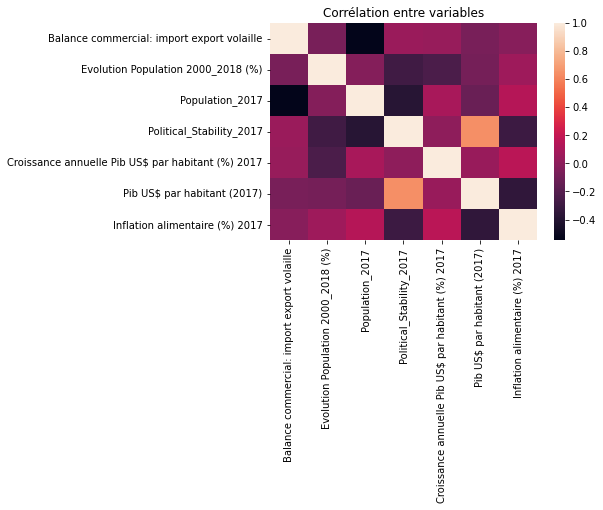

In [105]:
# Corrélation entre variables
sns.heatmap(DF_Eco.corr())
plt.title("Corrélation entre variables")
plt.show()

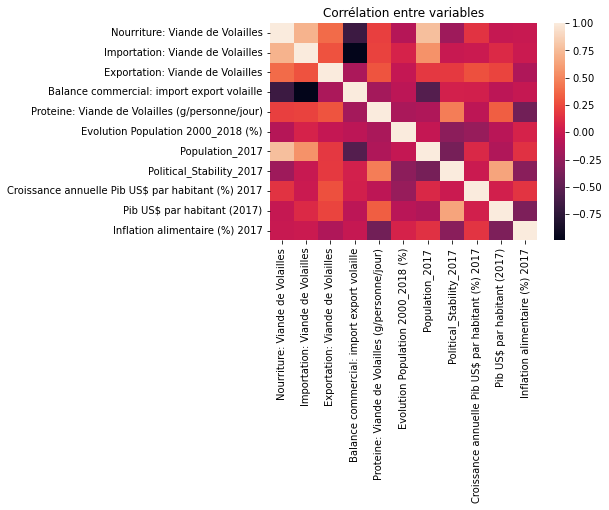

In [106]:
# Corrélation entre variables
sns.heatmap(DF_Final.corr())
plt.title("Corrélation entre variables")
plt.show()

In [107]:
DF_Final.to_csv('DF_Final.csv')
DF_Eco.to_csv('DF_Eco.csv')

Salut !

Comme on en a déjà brièvement parlé, je te fais ce mail pour te briefer sur la mission d’analyse pour le lancement à l’international.

Ton objectif sera de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché. 

Tu seras en totale autonomie sur ce projet, notamment sur le choix des données à analyser et même du langage à utiliser (R ou Python). 

Pars des données de la FAO (Food and Agriculture Organization) que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en open data que tu souhaites sur le site de la FAO.

Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...

Voici ce que j’attends de toi :

un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données ;
un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées ;
une présentation qui récapitule les points suivants : 
le contexte du projet de data analyse ;
votre démarche (sans entrer dans les détails mathématiques, mais en vulgarisant les sujets abordés) ;
vos résultats et recommandations.
 

Bon courage !

Patrick